In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Final Project'
print(os.listdir(BASE_FILE_PATH))

['Keys', 'Setting up connection with Git-Hub.ipynb', 'entries.csv', 'summoner_details.csv', 'updated_dataset.csv', 'filtered_dataset.csv', 'filtered_dataset.gsheet', 'filtered_+30_matches_dataset.csv', 'EDA.ipynb', 'merged_dataset.csv', 'Merging match with entries and classifying accounts.ipynb', 'merged_dataset.gsheet', 'Feature engineering and cleaning vol 1.ipynb', 'Normalization_Parameters.csv', 'logit predict without normalization.ipynb', 'keepign only win feature .ipynb']


In [4]:
df = pd.read_csv(os.path.join(BASE_FILE_PATH, 'merged_dataset.csv'))
df.head()

,match_id,game_creation,game_duration,game_mode,game_version,map_id,summoner_id,puuid,champion_id,kills,...,team_position,win,game_duration_min,game_creation_dt,time_segment,tier,rank,days_since_last_game,time_group,binary_time_group
0,NA1_4967002924,1712434308642,1087,CLASSIC,14.7.571.9528,11,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,17,3,...,UTILITY,True,18.116667,2024-04-06 20:11:48.642,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
1,NA1_5050183543,1721508545865,1282,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,30,14,...,All Mid,True,21.366667,2024-07-20 20:49:05.865,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
2,NA1_5050376845,1721513174857,1327,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,161,12,...,All Mid,False,22.116667,2024-07-20 22:06:14.857,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
3,NA1_5052219350,1721575116568,1344,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,15,6,...,All Mid,False,22.400000,2024-07-21 15:18:36.568,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active
4,NA1_5052262521,1721577348686,1261,ARAM,14.14.602.7801,12,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,238,11,...,All Mid,True,21.016667,2024-07-21 15:55:48.686,First Period,GOLD,IV,15,Moderately Inactive (15-28 days),Active


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   match_id              128021 non-null  object 
 1   game_creation         128021 non-null  int64  
 2   game_duration         128021 non-null  int64  
 3   game_mode             128021 non-null  object 
 4   game_version          128021 non-null  object 
 5   map_id                128021 non-null  int64  
 6   summoner_id           128021 non-null  object 
 7   puuid                 128021 non-null  object 
 8   champion_id           128021 non-null  int64  
 9   kills                 128021 non-null  int64  
 10  deaths                128021 non-null  int64  
 11  assists               128021 non-null  int64  
 12  total_damage_dealt    128021 non-null  int64  
 13  total_damage_taken    128021 non-null  int64  
 14  gold_earned           128021 non-null  int64  
 15  

In [6]:
columns_to_drop = [
    "match_id", "game_version", "map_id", "puuid", "champion_id",
    "vision_score", "tier", "rank", "time_group", "game_duration_min", "team_position", "game_mode"
]

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   game_creation         128021 non-null  int64 
 1   game_duration         128021 non-null  int64 
 2   summoner_id           128021 non-null  object
 3   kills                 128021 non-null  int64 
 4   deaths                128021 non-null  int64 
 5   assists               128021 non-null  int64 
 6   total_damage_dealt    128021 non-null  int64 
 7   total_damage_taken    128021 non-null  int64 
 8   gold_earned           128021 non-null  int64 
 9   total_minions_killed  128021 non-null  int64 
 10  win                   128021 non-null  bool  
 11  game_creation_dt      128021 non-null  object
 12  time_segment          128021 non-null  object
 13  days_since_last_game  128021 non-null  int64 
 14  binary_time_group     128021 non-null  object
dtypes: bool(1), int64

In [8]:
df['KDA'] = (df['kills'] + df['assists']) / (df['deaths'] + 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_creation         128021 non-null  int64  
 1   game_duration         128021 non-null  int64  
 2   summoner_id           128021 non-null  object 
 3   kills                 128021 non-null  int64  
 4   deaths                128021 non-null  int64  
 5   assists               128021 non-null  int64  
 6   total_damage_dealt    128021 non-null  int64  
 7   total_damage_taken    128021 non-null  int64  
 8   gold_earned           128021 non-null  int64  
 9   total_minions_killed  128021 non-null  int64  
 10  win                   128021 non-null  bool   
 11  game_creation_dt      128021 non-null  object 
 12  time_segment          128021 non-null  object 
 13  days_since_last_game  128021 non-null  int64  
 14  binary_time_group     128021 non-null  object 
 15  

In [10]:
columns_to_drop = [
    "kills", "assists", "deaths"
]

In [11]:
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_creation         128021 non-null  int64  
 1   game_duration         128021 non-null  int64  
 2   summoner_id           128021 non-null  object 
 3   total_damage_dealt    128021 non-null  int64  
 4   total_damage_taken    128021 non-null  int64  
 5   gold_earned           128021 non-null  int64  
 6   total_minions_killed  128021 non-null  int64  
 7   win                   128021 non-null  bool   
 8   game_creation_dt      128021 non-null  object 
 9   time_segment          128021 non-null  object 
 10  days_since_last_game  128021 non-null  int64  
 11  binary_time_group     128021 non-null  object 
 12  KDA                   128021 non-null  float64
dtypes: bool(1), float64(1), int64(7), object(4)
memory usage: 11.8+ MB


In [13]:
df.head()

,game_creation,game_duration,summoner_id,total_damage_dealt,total_damage_taken,gold_earned,total_minions_killed,win,game_creation_dt,time_segment,days_since_last_game,binary_time_group,KDA
0,1712434308642,1087,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,21894,6011,5934,37,True,2024-04-06 20:11:48.642,First Period,15,Active,4.000000
1,1721508545865,1282,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,138247,41918,16715,116,True,2024-07-20 20:49:05.865,First Period,15,Active,2.000000
2,1721513174857,1327,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,110883,33804,14813,69,False,2024-07-20 22:06:14.857,First Period,15,Active,2.928571
3,1721575116568,1344,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,135813,42284,14972,112,False,2024-07-21 15:18:36.568,First Period,15,Active,1.761905
4,1721577348686,1261,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,62148,30458,15335,24,True,2024-07-21 15:55:48.686,First Period,15,Active,1.705882


In [14]:
df['win'] = df['win'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_creation         128021 non-null  int64  
 1   game_duration         128021 non-null  int64  
 2   summoner_id           128021 non-null  object 
 3   total_damage_dealt    128021 non-null  int64  
 4   total_damage_taken    128021 non-null  int64  
 5   gold_earned           128021 non-null  int64  
 6   total_minions_killed  128021 non-null  int64  
 7   win                   128021 non-null  int64  
 8   game_creation_dt      128021 non-null  object 
 9   time_segment          128021 non-null  object 
 10  days_since_last_game  128021 non-null  int64  
 11  binary_time_group     128021 non-null  object 
 12  KDA                   128021 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 12.7+ MB


In [16]:
df['game_creation_dt'] = pd.to_datetime(df['game_creation_dt'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128021 entries, 0 to 128020
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   game_creation         128021 non-null  int64         
 1   game_duration         128021 non-null  int64         
 2   summoner_id           128021 non-null  object        
 3   total_damage_dealt    128021 non-null  int64         
 4   total_damage_taken    128021 non-null  int64         
 5   gold_earned           128021 non-null  int64         
 6   total_minions_killed  128021 non-null  int64         
 7   win                   128021 non-null  int64         
 8   game_creation_dt      128021 non-null  datetime64[ns]
 9   time_segment          128021 non-null  object        
 10  days_since_last_game  128021 non-null  int64         
 11  binary_time_group     128021 non-null  object        
 12  KDA                   128021 non-null  float64       
dtyp

In [18]:
# Grouping data and calculating mean for numerical features
aggregated_features = df.groupby(['summoner_id', 'time_segment']).agg({
    'game_duration': 'mean',
    'total_damage_dealt': 'mean',
    'total_damage_taken': 'mean',
    'gold_earned': 'mean',
    'total_minions_killed': 'mean',
    'win': 'mean',
    'KDA': 'mean'
}).reset_index()



In [19]:
aggregated_features.head()

,summoner_id,time_segment,game_duration,total_damage_dealt,total_damage_taken,gold_earned,total_minions_killed,win,KDA
0,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,First Period,1193.250000,73341.050000,27007.550000,12460.350000,53.350000,0.600000,3.122261
1,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,Second Period,1201.736842,58673.000000,29933.315789,12464.210526,32.842105,0.473684,4.485632
2,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,Third Period,1239.894737,56054.052632,25757.000000,12006.210526,38.473684,0.473684,3.701786
3,-0FAl-E5gzHW35MsMHI7ZBv4jCme6S8TT2W7az4-G7x7Y-Yy,First Period,1888.388889,209304.055556,37955.277778,12002.611111,46.888889,0.500000,2.838344
4,-0FAl-E5gzHW35MsMHI7ZBv4jCme6S8TT2W7az4-G7x7Y-Yy,Second Period,1530.235294,146554.705882,25451.235294,11081.647059,94.529412,0.529412,2.088002


In [20]:
# Pivot the DataFrame
pivot_df = aggregated_features.pivot(index='summoner_id', columns='time_segment')

# Flatten the MultiIndex for columns
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Reset index to make 'summoner_id' a column again
pivot_df.reset_index(inplace=True)

In [21]:
# We will group by 'summoner_id' and pick the first 'binary_time_group' as an example
binary_time_df = df[['summoner_id', 'binary_time_group']].drop_duplicates()

# Merge with the pivot DataFrame
pivot_df = pivot_df.merge(binary_time_df, on='summoner_id', how='left')

In [22]:
pivot_df.head()

,summoner_id,game_duration_First Period,game_duration_Second Period,game_duration_Third Period,total_damage_dealt_First Period,total_damage_dealt_Second Period,total_damage_dealt_Third Period,total_damage_taken_First Period,total_damage_taken_Second Period,total_damage_taken_Third Period,...,total_minions_killed_First Period,total_minions_killed_Second Period,total_minions_killed_Third Period,win_First Period,win_Second Period,win_Third Period,KDA_First Period,KDA_Second Period,KDA_Third Period,binary_time_group
0,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,1193.250000,1201.736842,1239.894737,73341.050000,58673.000000,56054.052632,27007.550000,29933.315789,25757.000000,...,53.350000,32.842105,38.473684,0.600000,0.473684,0.473684,3.122261,4.485632,3.701786,Active
1,-0FAl-E5gzHW35MsMHI7ZBv4jCme6S8TT2W7az4-G7x7Y-Yy,1888.388889,1530.235294,1602.562500,209304.055556,146554.705882,138298.000000,37955.277778,25451.235294,26867.250000,...,46.888889,94.529412,95.687500,0.500000,0.529412,0.500000,2.838344,2.088002,1.820957,Active
2,-1ddPTjEGbdaQR2HcKWdP0qkBfSjsyJcFot0WGcyGxkjSy4,1893.600000,1670.050000,1829.578947,261661.000000,233526.200000,286978.684211,36543.750000,34420.550000,40164.473684,...,58.100000,41.000000,51.736842,0.550000,0.600000,0.526316,3.304328,2.773240,2.779528,Inactive
3,-2ksdxdFEy1AnyqNsmO-RI_2n8ic7mAzN5-LYGvttHTwY2...,1505.782609,1339.181818,1197.818182,138490.304348,94941.727273,75508.090909,35432.043478,36776.363636,36243.545455,...,40.130435,49.409091,73.000000,0.391304,0.636364,0.272727,1.769212,2.184300,1.988367,Active
4,-3ntNAfsqQ8f8pHSCh805dnhlQvmv2_GYLWxhwDfn6I1h2g,1738.619048,1544.600000,1775.263158,155603.904762,112706.550000,131292.315789,26206.761905,19188.700000,26684.315789,...,84.428571,125.300000,149.526316,0.476190,0.350000,0.526316,2.966462,1.993829,2.886372,Inactive


In [23]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   summoner_id                         2274 non-null   object 
 1   game_duration_First Period          2274 non-null   float64
 2   game_duration_Second Period         2274 non-null   float64
 3   game_duration_Third Period          2274 non-null   float64
 4   total_damage_dealt_First Period     2274 non-null   float64
 5   total_damage_dealt_Second Period    2274 non-null   float64
 6   total_damage_dealt_Third Period     2274 non-null   float64
 7   total_damage_taken_First Period     2274 non-null   float64
 8   total_damage_taken_Second Period    2274 non-null   float64
 9   total_damage_taken_Third Period     2274 non-null   float64
 10  gold_earned_First Period            2274 non-null   float64
 11  gold_earned_Second Period           2274 no

In [24]:
pivot_df.drop(columns=['summoner_id'], inplace=True)

In [25]:
X = pivot_df.drop('binary_time_group', axis=1)
y = pivot_df['binary_time_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Active       0.59      0.55      0.57       238
    Inactive       0.54      0.58      0.56       217

    accuracy                           0.56       455
   macro avg       0.57      0.57      0.56       455
weighted avg       0.57      0.56      0.57       455



In [28]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   game_duration_First Period          2274 non-null   float64
 1   game_duration_Second Period         2274 non-null   float64
 2   game_duration_Third Period          2274 non-null   float64
 3   total_damage_dealt_First Period     2274 non-null   float64
 4   total_damage_dealt_Second Period    2274 non-null   float64
 5   total_damage_dealt_Third Period     2274 non-null   float64
 6   total_damage_taken_First Period     2274 non-null   float64
 7   total_damage_taken_Second Period    2274 non-null   float64
 8   total_damage_taken_Third Period     2274 non-null   float64
 9   gold_earned_First Period            2274 non-null   float64
 10  gold_earned_Second Period           2274 non-null   float64
 11  gold_earned_Third Period            2274 no

In [29]:
# Filter and sample active players
active_samples = pivot_df[pivot_df['binary_time_group'] == 'Active'].sample(n=200, random_state=42)

# Filter and sample inactive players
inactive_samples = pivot_df[pivot_df['binary_time_group'] == 'Inactive'].sample(n=200, random_state=42)

# Combine both samples into a new DataFrame
filtered_df = pd.concat([active_samples, inactive_samples])

# Shuffle the DataFrame to mix active and inactive entries
filtered_df = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [30]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   game_duration_First Period          400 non-null    float64
 1   game_duration_Second Period         400 non-null    float64
 2   game_duration_Third Period          400 non-null    float64
 3   total_damage_dealt_First Period     400 non-null    float64
 4   total_damage_dealt_Second Period    400 non-null    float64
 5   total_damage_dealt_Third Period     400 non-null    float64
 6   total_damage_taken_First Period     400 non-null    float64
 7   total_damage_taken_Second Period    400 non-null    float64
 8   total_damage_taken_Third Period     400 non-null    float64
 9   gold_earned_First Period            400 non-null    float64
 10  gold_earned_Second Period           400 non-null    float64
 11  gold_earned_Third Period            400 non-n

In [32]:
from sklearn.metrics import classification_report, accuracy_score
# 1. Split the data into features and target
X = filtered_df.drop('binary_time_group', axis=1)
y = filtered_df['binary_time_group']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.6875
Classification Report:
              precision    recall  f1-score   support

      Active       0.71      0.62      0.67        40
    Inactive       0.67      0.75      0.71        40

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.69      0.69      0.69        80



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from lightgbm import LGBMClassifier

# Prepare data
X = filtered_df.drop(['binary_time_group'], axis=1)
y = filtered_df['binary_time_group']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

# Gradient Boosting Machine
gbm = LGBMClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train)
y_pred_gbm = gbm.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Gradient Boosting Machine Performance:")
print(classification_report(y_test, y_pred_gbm))

[LightGBM] [Info] Number of positive: 162, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined and properly scaled
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,633 (22.00 KB)

 Trainable params: 5,633 (22.00 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Convert categorical binary_time_group to numeric
y_train = y_train.map({'Active': 1, 'Inactive': 0}).astype('float')

In [48]:
# Check if conversion was successful
print(y_train.dtype)

# Re-run the model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

float64
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4698 - loss: 2241.7910 - val_accuracy: 0.5625 - val_loss: 771.4421
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5089 - loss: 885.0499 - val_accuracy: 0.4844 - val_loss: 778.4672
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5796 - loss: 787.1768 - val_accuracy: 0.4219 - val_loss: 843.8549
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5220 - loss: 759.2545 - val_accuracy: 0.4219 - val_loss: 643.4484
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5218 - loss: 469.2429 - val_accuracy: 0.6562 - val_loss: 213.0853
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5004 - loss: 381.3922 - val_accuracy: 0.4844 - val_loss: 250.9708
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4889 - loss: 426.2712 - val_accuracy: 0.4531 - val_loss: 883.1744
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5318 - loss: 543.7623 - val_accu

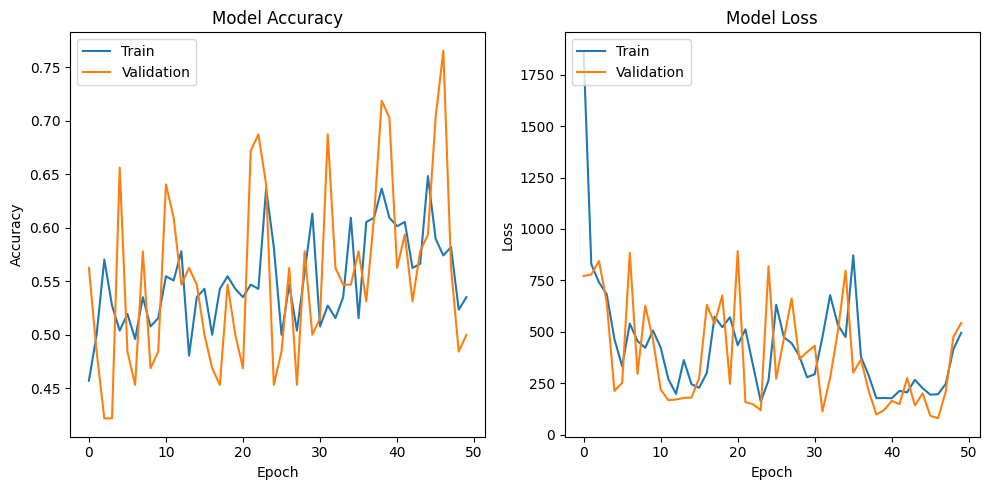

In [49]:
# Summarize history for accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [50]:
y_test = y_test.replace({'Active': 1, 'Inactive': 0})


In [51]:
# Assuming you have a test set X_test and y_test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

3/3 - 0s - 50ms/step - accuracy: 0.5375 - loss: 573.9591
Test Accuracy: 0.5375
Test Loss: 573.9591
